<font color='#315aa0'>**Data Sets**</font>
---

## <font color='#b0aeae'>**Índice**</font>

1. **Configuraciones**
   * Importación de librerías
   * Paths
   * Paletas de colores
2. **Exploración inicial**
   * Dataset Churn Bank
   * Dataset PaySim
3. **Manipulación de datos**
   * Churn
     - Fechas
     - Clusters Iniciales
     - Clusters K-Means
     - Interpretación Clusters K-Means
   * PaySim
     - Clasificación de transacciones
     - Asignación de transacciones
     - Limpieza datasets
     - Escalado del monto de las transacciones
4. **Salud del Dataset - Exploración**
   * Chequeos generales
   * Distribuciones numéricas
   * Churn
   * Correlación
5. **Filtrado**
6. **Guardado Datasets**

# <font color='#315aa0'>**Cofiguraciones**</font>

## <font color='#c37171'>**Importación de librerías**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import kagglehub

from tqdm import tqdm

import os
from pathlib import Path
from typing import Tuple, Callable, List

import warnings



In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

RANDOM_SEED = 42

## <font color='#c37171'>**Paths**</font>

In [3]:
# Obtiene el path actual
PROJECT_PATH = os.getcwd()

src = Path('src')
DATA_PATH = PROJECT_PATH / src

img = Path('img')
IMG_PATH = PROJECT_PATH / img

models = Path('models')
MODELS_PATH = PROJECT_PATH / models

reports = Path('reports')
REPORTS_PATH = PROJECT_PATH / reports

dirs = [DATA_PATH, IMG_PATH, MODELS_PATH, REPORTS_PATH]


for directory in dirs:
    if not directory.exists():
        directory.mkdir(parents=True)
        print(f'Directorio creado:\n{directory}\n')
    else:
        print(f'El directorio ya existe:\n{directory}\n')

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\src

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\img

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\models

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\reports



## <font color='#c37171'>**Paleta de Colores del Proyecto**</font>

**Bordós / Rojos**

<span style="display:inline-block; width:20px; height:20px; background:#620c0c; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#8b1f1f; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#a14b4b; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#c37171; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#e29c9c; margin-right:5px;"></span>

**Grises / Neutros**

<span style="display:inline-block; width:20px; height:20px; background:#5a5858; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#8c8a8a; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#b0aeae; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#d3d1d1; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#eae7e6; margin-right:5px;"></span>

**Azules**

<span style="display:inline-block; width:20px; height:20px; background:#0d1b3d; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#152a55; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#1e3a6c; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#274a84; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#315aa0; margin-right:5px;"></span>

**Cremas / Mostazas**

<span style="display:inline-block; width:20px; height:20px; background:#FCB53B; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDB860; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDC584; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDD2A9; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDE0CE; margin-right:5px;"></span>

In [4]:
BORDO_1, BORDO_2, BORDO_3, BORDO_4, BORDO_5 = '#620c0c', '#8b1f1f', '#a14b4b', '#c37171', '#e29c9c' 
GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = '#5a5858', '#8c8a8a', '#b0aeae', '#d3d1d1', '#eae7e6' 
AZUL_1, AZUL_2, AZUL_3, AZUL_4, AZUL_5 = '#0d1b3d', '#152a55', '#1e3a6c', '#274a84', '#315aa0' 
CREMA_1, CREMA_2, CREMA_3, CREMA_4, CREMA_5 = '#FCB53B', '#FDB860', '#FDC584', '#FDD2A9', '#FDE0CE'

# <font color='#315aa0'>**Exploración inicial**</font>

## <font color='#c37171'>**Dataset Churn Bank**</font>

In [5]:
df_churn = pd.read_csv(DATA_PATH/'churn.csv')
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df_churn['Exited'].sum()

2037

In [9]:
df_churn['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [10]:
df_churn['CustomerId'].nunique()

10000

## <font color='#c37171'>**Dataset PaySim**</font>

In [11]:
path_paysim = kagglehub.dataset_download('ealaxi/paysim1')

print('Path to dataset PaySim:', path_paysim)

Path to dataset PaySim: C:\Users\Ignacio\.cache\kagglehub\datasets\ealaxi\paysim1\versions\2


In [12]:
paysim_file = Path('PS_20174392719_1491204439457_log.csv')
df_paysim = pd.read_csv(path_paysim / paysim_file)
df_paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df_paysim.shape

(6362620, 11)

In [14]:
df_paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df_paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
df_paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
df_paysim['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [18]:
df_paysim['type'].value_counts(normalize=True)

type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64

In [19]:
df_paysim['amount'].max()

92445516.64

In [20]:
df_churn['EstimatedSalary'].max()

199992.48

In [21]:
len(df_paysim) / df_churn['CustomerId'].nunique()

636.262

## <font color='#FCB53B'>**Observaciones iniciales**</font>

### <font color='#c37171'>**DataFrame PaySim (Simluación Transacciones Bancarias)**</font>

* **Cantidad transacciones:** 6 362 620

* **Max Transaction amount:** 92 445 516.64

### <font color='#c37171'>**DataFrame Churn**</font>

* **Clientes unicos:** 10 000
  
* **Clientes Churn = Yes:** 2037 *(20% aprox)*

* **Max balance**: 250 898.09
* **Max estimated salary**: 199 992.48

### **Problemas iniciales**

El primer problema surge por supuesto porque los Ids no son los mismos, ya que no corresponden al mismo dataset. Uno cuenta con 10000 ids unicos (df_churn), el otro cuenta con 6353307 ids unicos (casi la misma cantidad de transacciones).

Otro problema que surge es que los montos son muy distintos entre ambos datasets. Se puede ver en el monto maximo de transaccion de PaySim y el balance maximo de Churn Otra cosa es que el step es de una hora, cuenta con 743 (correspondiente a un mes) cuando el tenure en el df_churn está medido en años, esto habrá que modificarlo de alguna manera.
<br>
### **Ideas iniciales**
<br>

> **TRANSACCIONES**

* Quedarme con todas las transacciones. Pero como el objetivo del problema es churn, no me interesan varias columnas. 

Consevaría:

**step:** lo transformaría en fechas en un rango quizás de 2 años ya que hay 743 steps<br>
**type:** tipo de transacciones<br>
**amount:** necesita ser reescalado, y las transacciones no pueden ser nunca mayores al saldo de la cuenta<br>
**nameOrig:** reemplazar por IDs de df_churn<br>

Estas dos no estoy seguro todavía:

**oldbalanceOrg**<br>
**newbalanceOrig**

<br>

> **IDs**

* Utilizar los IDs de **df_churn**, y buscar la manera de asignarlos de manera aleatoria a las transacciones. Esto deberá seguir cierta lógica ya que los clientes que se fueron no deberían tener transacciones en los últimos X meses.
Esto deberá respetar una logica donde se agrupen los clientes que tienen `Exited = 1` y que vaya variando, debe haber clientes con distintas fechas de abandono, entre 6 y 0 meses.

# <font color='#315aa0'>**Manipulación de datos**</font>

## 🔑 <font color='#c37171'>**Principios para evitar “dataset basura”**</font>
---

### 1. Definir hipótesis de negocio realistas

Antes de tocar los datos, escribir supuestos que tengan sentido en un banco real:

- Clientes con menos interacciones en la app = más probabilidad de churn.
- Disminución en frecuencia de transacciones en los últimos meses = mayor riesgo de churn.
- Edad y salario influyen en la estabilidad del cliente (jóvenes y bajos salarios = más churn).
- Factores externos como inflación alta → más churn en clientes de bajo ingreso.

> 👉 Esto asegura que los patrones que generes no sean aleatorios, sino consistentes con lo que podría pasar en la realidad.

---

### 2. Usar correlaciones en lugar de ruido puro
En lugar de asignar variables externas o de interacción al azar:

- Introducir variables que estén correlacionadas con churn de forma controlada.

**Ejemplo:**
- Clientes que hicieron churn tienen un 40% menos de interacciones con la app en los últimos 3 meses.
- Clientes de churn tienen un 20% más de transacciones fallidas o rechazadas.
- Factores externos (ej: inflación simulada) afectan más a clientes con Balance < X.

> 👉 Esto genera señales diferenciales para el modelo.

---

### 3. Introducir variabilidad dentro de cada grupo

No todos los clientes que hicieron churn deben tener baja actividad. Introducir distribuciones:

- 60% de churners tienen muy baja interacción.
- 30% tienen actividad media.
- 10% siguen siendo activos hasta el final.

> 👉 Esto evita que el modelo aprenda reglas triviales (del tipo: “si transacciones = 0 → churn”).

---

### 4. Usar ruido controlado (stochastic noise)
Un poco de azar es necesario para que no todo sea determinístico, pero debe ser pequeño en comparación con la señal principal.

**Ejemplo:**  
Número de interacciones promedio de un churner = 20, con desviación estándar de ±5.

---

### 5. Validación manual antes del modelo
Antes de entrenar, explorar el dataset final con gráficos:

- Histograma de transacciones churn vs no churn.
- Interacciones app churn vs no churn.
- Factores externos según balance.

> 👉 Si se ven diferencias razonables entre grupos, entonces el dataset tiene patrones útiles.

---

## 🔧 <font color='#c37171'>**Overview de los 4 datasets**</font>

### 1. Churn (base)
- Target + atributos estáticos.

### 2. Transacciones
- Clientes que hicieron churn deben mostrar una caída de actividad en los últimos meses.
- Clientes que no hicieron churn mantienen o aumentan su actividad.

### 3. Interacciones con la app
- Churners: menor login, menor tiempo en app, menos clicks en productos financieros.
- No churners: más consistencia en el uso.

### 4. Factores externos
- Podés simular inflación, tasa de interés, etc.
- Definí reglas: clientes de menor salario son más sensibles = más probabilidad de churn cuando inflación sube.

## <font color='#c37171'>**Churn**</font>

In [22]:
df_churn_man = df_churn.copy()

### <font color='#FCB53B'>**Fechas**</font>

In [23]:
periods = df_paysim['step'].nunique()
periods

743

In [24]:
end_date = pd.to_datetime('2025-09-30')
end_date

Timestamp('2025-09-30 00:00:00')

In [25]:
start_date = end_date - pd.Timedelta(days=periods-1)
start_date

Timestamp('2023-09-19 00:00:00')

In [26]:
# Rango de fechas de acuerdo a la cantida de steps dentro del df_paysim
fechas = pd.date_range(start=start_date, periods=periods, freq="D")
fechas

DatetimeIndex(['2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
               '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26',
               '2023-09-27', '2023-09-28',
               ...
               '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-26', '2025-09-27', '2025-09-28',
               '2025-09-29', '2025-09-30'],
              dtype='datetime64[ns]', length=743, freq='D')

In [27]:
enum = [i for i in range(1, 744)]

In [28]:
df_fechas = pd.DataFrame({'step': enum, 'fecha': fechas})
df_fechas

,step,fecha
0,1,2023-09-19
1,2,2023-09-20
2,3,2023-09-21
3,4,2023-09-22
4,5,2023-09-23
...,...,...
738,739,2025-09-26
739,740,2025-09-27
740,741,2025-09-28
741,742,2025-09-29


In [29]:
df_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   step    743 non-null    int64         
 1   fecha   743 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.7 KB


In [30]:
fechas_abandono = fechas[int((len(fechas) * 0.84)):]
fechas_abandono

DatetimeIndex(['2025-06-04', '2025-06-05', '2025-06-06', '2025-06-07',
               '2025-06-08', '2025-06-09', '2025-06-10', '2025-06-11',
               '2025-06-12', '2025-06-13',
               ...
               '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-26', '2025-09-27', '2025-09-28',
               '2025-09-29', '2025-09-30'],
              dtype='datetime64[ns]', length=119, freq='D')

In [31]:
import random

np.random.seed(RANDOM_SEED)

abandono_cust = []

for exited in df_churn_man['Exited']:
    if exited == 1:
        if random.random() < 0.95:
            # 95% de churners en los últimos 4 meses
            rand_idx = int(np.random.triangular(0, len(fechas_abandono)-1, len(fechas_abandono)-1))
            abandono_cust.append(fechas_abandono[rand_idx])
        else:
            # 5 % churners en cualquier fecha del período
            abandono_cust.append(random.choice(fechas))
    else:
        abandono_cust.append(np.nan)

In [32]:
df_churn_man['ExitDate'] = abandono_cust

In [33]:
df_churn_man

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaT
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NaT
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2025-09-06
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2025-07-04


### <font color='#FCB53B'>**Clusteres iniciales**</font>

Se asignarán scores de acuerdo a distintos aspectos del cliente:

* Tiempo: Edad y Antigüedad
* Riqueza: Balance, Salario Estimado y Puntaje Crediticio
* Compromiso: Número de productos, si Cuenta con Tarjeta de Crédito y si es Miembro Activo

Esto permitirá asignar un puntaje a cada cliente referente a cada aspecto, esto se utilizará luego para realizar una clusterización, y usar los clusters para asignar posteriormente las transacciones e interacciones con la app.

In [34]:
df_clusters = df_churn_man.copy()

In [35]:
df_clusters['cluster_time'] = pd.qcut(df_clusters['Tenure']*0.6 + df_clusters['Age']*0.4, q=3, labels=['Low','Medium','High'])

In [36]:
df_clusters['wealth_score'] = df_clusters['Balance']*0.5 + df_clusters['EstimatedSalary']*0.4 + df_clusters['CreditScore']*0.1

df_clusters['cluster_wealth'] = pd.qcut(df_clusters['wealth_score'], q=3, labels=['Low','Medium','High'])

In [37]:
df_clusters['engagement_score'] = df_clusters['NumOfProducts']*0.5 + df_clusters['HasCrCard']*0.2 + df_clusters['IsActiveMember']*0.3
df_clusters['cluster_engagement'] = pd.qcut(df_clusters['engagement_score'], q=3, labels=['Low','Medium','High'])

In [38]:
df_clusters

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_time,wealth_score,cluster_wealth,engagement_score,cluster_engagement
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15,Medium,40601.452,Low,1.0,Low
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT,Medium,86981.762,Medium,0.8,Low
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27,High,125453.228,High,1.7,High
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Low,37600.552,Low,1.0,Low
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Medium,94474.050,Medium,1.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaT,Medium,38585.356,Low,1.2,Medium
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NaT,High,69416.313,Medium,1.0,Low
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2025-09-06,Medium,16905.132,Low,0.8,Low
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2025-07-04,Medium,74770.263,Medium,1.2,Medium


In [39]:
# Normalizar los scores para que estén en la misma escala
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_clusters[['wealth_score_norm', 'engagement_score_norm']] = scaler.fit_transform(df_clusters[['wealth_score', 'engagement_score']])

time_mapping = {'Low': 0, 'Medium': 0.5, 'High': 1}
df_clusters['cluster_time_num'] = df_clusters['cluster_time'].map(time_mapping).astype(float)

df_clusters.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_time,wealth_score,cluster_wealth,engagement_score,cluster_engagement,wealth_score_norm,engagement_score_norm,cluster_time_num
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15,Medium,40601.452,Low,1.0,Low,0.220009,0.25,0.5
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT,Medium,86981.762,Medium,0.8,Low,0.471943,0.15,0.5
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27,High,125453.228,High,1.7,High,0.680918,0.60,1.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Low,37600.552,Low,1.0,Low,0.203708,0.25,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Medium,94474.050,Medium,1.0,Low,0.512641,0.25,0.5


In [40]:
df_clusters['final_score'] = 0.4 * df_clusters['wealth_score_norm'] + 0.4 * df_clusters['engagement_score_norm'] + 0.2 * df_clusters['cluster_time_num']

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df_clusters['cluster_final'] = kmeans.fit_predict(df_clusters[['final_score']])

In [42]:
df_clusters

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_time,wealth_score,cluster_wealth,engagement_score,cluster_engagement,wealth_score_norm,engagement_score_norm,cluster_time_num,final_score,cluster_final
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15,Medium,40601.452,Low,1.0,Low,0.220009,0.25,0.5,0.288004,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT,Medium,86981.762,Medium,0.8,Low,0.471943,0.15,0.5,0.348777,4
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27,High,125453.228,High,1.7,High,0.680918,0.60,1.0,0.712367,3
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Low,37600.552,Low,1.0,Low,0.203708,0.25,0.0,0.181483,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Medium,94474.050,Medium,1.0,Low,0.512641,0.25,0.5,0.405056,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaT,Medium,38585.356,Low,1.2,Medium,0.209058,0.35,0.5,0.323623,2
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NaT,High,69416.313,Medium,1.0,Low,0.376529,0.25,1.0,0.450612,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2025-09-06,Medium,16905.132,Low,0.8,Low,0.091292,0.15,0.5,0.196517,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2025-07-04,Medium,74770.263,Medium,1.2,Medium,0.405611,0.35,0.5,0.402245,4


### <font color='#FCB53B'>**Interpretación clusters K-Means**</font>

In [43]:
clusters_count = df_clusters['cluster_final'].value_counts()
clusters_count

cluster_final
4    2874
2    2646
0    2230
1    1434
3     816
Name: count, dtype: int64

In [44]:
df_clusters_count = pd.DataFrame({'index':clusters_count.index, 'count': clusters_count})

In [45]:
df_clusters_count

,index,count
cluster_final,,
4,4,2874
2,2,2646
0,0,2230
1,1,1434
3,3,816


In [46]:
centroids_clusters_kmeans = kmeans.cluster_centers_
df_centroides = pd.DataFrame(centroids_clusters_kmeans, columns=['final_score'])
df_centroides.reset_index(inplace=True)

In [47]:
df_centroides

,index,final_score
0,0,0.494466
1,1,0.191013
2,2,0.299533
3,3,0.624389
4,4,0.395506


In [48]:
df_centroides = df_centroides.merge(df_clusters_count, on='index')
df_centroides = df_centroides.rename(columns={'index': 'cluster'})

In [49]:
df_centroides.sort_values('final_score')

,cluster,final_score,count
1,1,0.191013,1434
2,2,0.299533,2646
4,4,0.395506,2874
0,0,0.494466,2230
3,3,0.624389,816


In [50]:
def proporcion_labels(df):
    """
    Esta función tomará un df que debe corresponder a un unico cluster y
    retornará las proporciones de cada etiqueta de los clusters utilizados inicialmente
    """
    
    cluster_labels = ['cluster_time', 'cluster_wealth', 'cluster_engagement']
    counts = {}

    for cluster in cluster_labels:
        counts[cluster] = df[cluster].value_counts(normalize=True)

    return pd.DataFrame(counts)

#### <font color='#FDD2A9'>**Cluster 0**</font>

In [51]:
cluster_0 = df_clusters[df_clusters['cluster_final'] == 0]
prop_cluster_0 = proporcion_labels(cluster_0)
prop_cluster_0

,cluster_time,cluster_wealth,cluster_engagement
Low,0.070852,0.123318,0.503139
Medium,0.311211,0.343049,0.134978
High,0.617937,0.533632,0.361883


#### <font color='#FDD2A9'>**Observaciones Cluster 0:**</font>

Los clientes del **Cluster 0** cuentan con las siguientes características:
* Cuenta con un **score general** de: **0.494466** (2do más alto en el ranking)
* **Cantidad de clientes** pertenencientes al cluster: **2230 clientes**
* *cluster_time:* 60% para clientes con un alto score de tiempo (edad y permanencia) y 30% para término medio.
* *cluster_wealth:* 50% concentrado en clientes con buena salud económica, 35% para término medio.
* *cluster_engagement:* 50% con poco engagement, 35% con alto engagement.

Este es un buen perfil de cliente, ya que son clientes antiguos y con buen poder adquisitivo

#### <font color='#FDD2A9'>**Cluster 1**</font>

In [52]:
cluster_1 = df_clusters[df_clusters['cluster_final'] == 1]
prop_cluster_1 = proporcion_labels(cluster_1)
prop_cluster_1

,cluster_time,cluster_wealth,cluster_engagement
Low,0.82636,0.734310,0.722455
Medium,0.16318,0.243375,0.156206
High,0.01046,0.022315,0.121339


#### <font color='#FDD2A9'>**Observaciones Cluster 1:**</font>

Los clientes del **Cluster 1** cuentan con las siguientes características:

* Cuenta con un **score general** de: **0.191013** (ranking más bajo)
* **Cantidad de clientes** pertenencientes al cluster: **1434 clientes**
* *cluster_time:* 82% para clientes con un bajo score de tiempo (edad y permanencia) y 16% para término medio.
* *cluster_wealth:* 73% concentrado en clientes con baja salud económica, 24% para término medio.
* *cluster_engagement:* 72% con poco engagement, 12% con engagement término medio y 12% con alto engagement.

Este es el perfi de cliente con menor valor para la empresa, son clientes nuevos, de bajo poder adquisitivo, y con poco compromiso

#### <font color='#FDD2A9'>**Cluster 2**</font>

In [53]:
cluster_2 = df_clusters[df_clusters['cluster_final'] == 2]
prop_cluster_2 = proporcion_labels(cluster_2)
prop_cluster_2

,cluster_time,cluster_wealth,cluster_engagement
Low,0.522298,0.432729,0.642857
Medium,0.387755,0.365835,0.167800
High,0.089947,0.201436,0.189342


#### <font color='#FDD2A9'>**Observaciones Cluster 2:**</font>

Los clientes del **Cluster 2** cuentan con las siguientes características:

* Cuenta con un **score general** de: **0.299533**
* **Cantidad de clientes** pertenencientes al cluster: **2646 clientes**
* *cluster_time:* 52% para clientes con un bajo score de tiempo (edad y permanencia) y 38% para término medio.
* *cluster_wealth:* 20% concentrado en clientes con buena salud económica, 36% para término medio, y 43% para baja riqueza.
* *cluster_engagement:* 64% con poco engagement, 16% con engagement término medio y 19% con alto engagement.

Este es el perfi de cliente tiene poco compromiso, pero con potencial para fidelizar, ya que la riqueza esta distribuida de forma relativamente pareja, y son clientes nuevos y/o jovenes.

#### <font color='#FDD2A9'>**Cluster 3**</font>

In [54]:
cluster_3 = df_clusters[df_clusters['cluster_final'] == 3]
prop_cluster_3 = proporcion_labels(cluster_3)
prop_cluster_3

,cluster_time,cluster_wealth,cluster_engagement
Low,0.009804,0.030637,0.215686
Medium,0.151961,0.197304,0.123775
High,0.838235,0.772059,0.660539


#### <font color='#FDD2A9'>**Observaciones Cluster 3:**</font>

Los clientes del **Cluster 3** cuentan con las siguientes características:
	
* Cuenta con un **score general** de: **0.624389** (ranking más alto)
* **Cantidad de clientes** pertenencientes al cluster: **816 clientes** (cluster más pequeño)
* *cluster_time:* 83% para clientes con un alto score de tiempo (edad y permanencia) y 15% para término medio.
* *cluster_wealth:* 77% concentrado en clientes con buena salud económica, 19% para término medio, y 3% para baja riqueza.
* *cluster_engagement:* 66% con alto engagement, 12% con engagement término medio y 21% con bajo engagement.

Este es el perfil de cliente **"VIP"**. Son clientes antiguos y con muy buena salud económica (posiblemente también sean los clientes más adultos). Y con buen nivel de compromiso.

#### <font color='#FDD2A9'>**Cluster 4**</font>

In [55]:
cluster_4 = df_clusters[df_clusters['cluster_final'] == 4]
prop_cluster_4 = proporcion_labels(cluster_4)
prop_cluster_4

,cluster_time,cluster_wealth,cluster_engagement
Low,0.218163,0.290536,0.585247
Medium,0.452679,0.379610,0.153445
High,0.329158,0.329854,0.261308


#### <font color='#FDD2A9'>**Observaciones Cluster 4:**</font>

Los clientes del **Cluster 4** cuentan con las siguientes características:
	
* Cuenta con un **score general** de: **0.395506**
* **Cantidad de clientes** pertenencientes al cluster: **2874 clientes** (cluster más grande)
* *cluster_time:* 32% para clientes con un alto score de tiempo (edad y permanencia) y 45% para término medio y 21% de bajo score de tiempo.
* *cluster_wealth:* 32% de clientes con buena salud económica, 37% para término medio, y 29% para baja riqueza.
* *cluster_engagement:* 26% con alto engagement, 15% con engagement término medio y 58% con bajo engagement.

Este es el perfil de cliente **"Standard"**. Son clientes ni muy antiguos ni muy nuevos, ni muy ricos ni muy pobres, predomina un compromiso bajo.

In [56]:
etiquetas = {0: 'Valioso - Bajo compromiso',
             1: 'Nuevos - Poco Valor',
             2: 'Clientes potenciales',
             3: 'VIP',
             4: 'Standard'}

In [57]:
df_clusters['cluster_label'] = df_clusters['cluster_final'].map(etiquetas)

In [58]:
df_clusters.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_time,wealth_score,cluster_wealth,engagement_score,cluster_engagement,wealth_score_norm,engagement_score_norm,cluster_time_num,final_score,cluster_final,cluster_label
8161,8162,15615352,Ebelechukwu,588,France,Male,31,4,99607.37,2,0,1,35877.03,0,NaT,Low,64213.297,Medium,1.3,High,0.348267,0.40,0.0,0.299307,2,Clientes potenciales
6456,6457,15755978,Tseng,606,France,Male,31,10,0.00,2,1,0,195209.40,0,NaT,Medium,78144.360,Medium,1.2,Medium,0.423939,0.35,0.5,0.409576,4,Standard
5936,5937,15773723,Duncan,588,Spain,Female,22,9,67178.19,1,1,1,163534.75,1,2025-08-27,Low,99061.795,High,1.0,Low,0.537561,0.25,0.0,0.315025,2,Clientes potenciales
3608,3609,15601873,Bull,677,France,Female,36,7,0.00,1,1,0,47318.75,0,NaT,Medium,18995.200,Low,0.7,Low,0.102645,0.10,0.5,0.181058,1,Nuevos - Poco Valor
1457,1458,15590320,Shelton,850,France,Male,66,4,0.00,2,0,1,64350.80,0,NaT,High,25825.320,Low,1.3,High,0.139746,0.40,1.0,0.415898,4,Standard
7157,7158,15627699,Pirogova,558,France,Male,32,10,105000.23,1,1,0,190019.61,0,NaT,Medium,128563.759,High,0.7,Low,0.697814,0.10,0.5,0.419126,4,Standard
5522,5523,15686696,Brown,817,France,Female,37,6,81070.34,2,1,0,80985.88,0,NaT,Medium,73011.222,Medium,1.2,Medium,0.396056,0.35,0.5,0.398423,4,Standard
3378,3379,15571302,Estep,529,Germany,Male,72,5,94216.05,1,1,1,78695.68,0,NaT,High,78639.197,Medium,1.0,Low,0.426627,0.25,1.0,0.470651,0,Valioso - Bajo compromiso
2788,2789,15726589,Matveyev,540,Germany,Male,39,1,82531.11,1,1,0,114092.52,0,NaT,Low,86956.563,Medium,0.7,Low,0.471807,0.10,0.0,0.228723,1,Nuevos - Poco Valor
4075,4076,15761600,White,713,France,Male,43,5,86394.14,1,1,1,130001.13,0,NaT,High,95268.822,Medium,1.0,Low,0.516958,0.25,1.0,0.506783,0,Valioso - Bajo compromiso


In [59]:
df_churn_labeled = df_clusters.copy()

In [60]:
df_churn_labeled.groupby('cluster_label')['cluster_label'].value_counts()

cluster_label
Clientes potenciales         2646
Nuevos - Poco Valor          1434
Standard                     2874
VIP                           816
Valioso - Bajo compromiso    2230
Name: count, dtype: int64

In [61]:
df_churn_labeled['cluster_label'].value_counts(normalize=True)

cluster_label
Standard                     0.2874
Clientes potenciales         0.2646
Valioso - Bajo compromiso    0.2230
Nuevos - Poco Valor          0.1434
VIP                          0.0816
Name: proportion, dtype: float64

In [62]:
churn_yes = df_churn_labeled[df_churn_labeled['Exited'] == 1]
churn_yes.groupby('cluster_label')['cluster_label'].value_counts()

cluster_label
Clientes potenciales         380
Nuevos - Poco Valor          178
Standard                     590
VIP                          329
Valioso - Bajo compromiso    560
Name: count, dtype: int64

## <font color='#c37171'>**PaySim**</font>

In [63]:
df_paysim_man = df_paysim.copy()

In [64]:
df_paysim_man.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [65]:
df_paysim_man.drop(['nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                   'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
                   'isFlaggedFraud'], 
                   axis=1, 
                   inplace=True)

In [66]:
fechas_paysim = df_fechas.copy()

In [67]:
df_paysim_man = df_paysim_man.merge(df_fechas, on='step', how='left')
df_paysim_man.head(20)

,step,type,amount,fecha
0,1,PAYMENT,9839.64,2023-09-19
1,1,PAYMENT,1864.28,2023-09-19
2,1,TRANSFER,181.00,2023-09-19
3,1,CASH_OUT,181.00,2023-09-19
4,1,PAYMENT,11668.14,2023-09-19
5,1,PAYMENT,7817.71,2023-09-19
6,1,PAYMENT,7107.77,2023-09-19
7,1,PAYMENT,7861.64,2023-09-19
8,1,PAYMENT,4024.36,2023-09-19
9,1,DEBIT,5337.77,2023-09-19


In [68]:
df_paysim_man.groupby('type')['type'].value_counts()

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: count, dtype: int64

In [69]:
df_paysim_man.describe()

,step,amount,fecha
count,6.362620e+06,6.362620e+06,6362620
mean,2.433972e+02,1.798619e+05,2024-05-18 09:32:02.022565120
min,1.000000e+00,0.000000e+00,2023-09-19 00:00:00
25%,1.560000e+02,1.338957e+04,2024-02-21 00:00:00
50%,2.390000e+02,7.487194e+04,2024-05-14 00:00:00
75%,3.350000e+02,2.087215e+05,2024-08-18 00:00:00
max,7.430000e+02,9.244552e+07,2025-09-30 00:00:00
std,1.423320e+02,6.038582e+05,NaN


### <font color='#FCB53B'>**Clasificación de transacciones**</font>

Para poder asignar las transacciones a los clientes del **DataFrame de Churn**, se buscará hacer una clusterización teniendo el cuenta algunas características del presente dataset para conseguir patrones sintéticos pero lógicos, cercanos a la realidad.

#### <font color='#FDD2A9'>**Amount**</font>

In [70]:
percentiles_amount = df_paysim_man.groupby('type')['amount'].quantile([0.25, 0.75]).unstack()
percentiles_amount

,0.25,0.75
type,,
CASH_IN,70510.1825,239899.0875
CASH_OUT,72669.6500,246539.4775
DEBIT,1500.1800,5479.1750
PAYMENT,4383.8200,17561.2200
TRANSFER,215905.3500,974958.0000


In [71]:
df_paysim_man['amount_q1'] = df_paysim_man['type'].map(percentiles_amount[0.25])
df_paysim_man['amount_q3'] = df_paysim_man['type'].map(percentiles_amount[0.75])

In [72]:
conditions = [
    df_paysim_man['amount'] < df_paysim_man['amount_q1'],
    df_paysim_man['amount'] < df_paysim_man['amount_q3']
]

options = ['Low', 'Medium']

df_paysim_man['amount_label'] = np.select(conditions, options, default='High')

In [73]:
df_paysim_man.sample(20)

,step,type,amount,fecha,amount_q1,amount_q3,amount_label
5509140,380,PAYMENT,26016.52,2024-10-02,4383.8200,17561.2200,High
6186519,567,CASH_IN,370069.15,2025-04-07,70510.1825,239899.0875,High
2838925,226,PAYMENT,11263.72,2024-05-01,4383.8200,17561.2200,Medium
4022057,299,CASH_IN,266007.12,2024-07-13,70510.1825,239899.0875,High
3089985,235,PAYMENT,25664.52,2024-05-10,4383.8200,17561.2200,High
4798878,345,PAYMENT,7207.64,2024-08-28,4383.8200,17561.2200,Medium
4906811,349,CASH_OUT,107985.42,2024-09-01,72669.6500,246539.4775,Medium
964609,44,CASH_OUT,32082.03,2023-11-01,72669.6500,246539.4775,Low
3402154,255,CASH_OUT,29521.95,2024-05-30,72669.6500,246539.4775,Low
6353713,707,PAYMENT,23538.40,2025-08-25,4383.8200,17561.2200,High


#### <font color='#FDD2A9'>**Frequency**</font>

Para la **Frecuencia** se tomará la proporcion de cada tipo de transacción en la totalidad del dataset, y a partir de la presencia de cada una se determinará si es de Baja, Media o Alta *(Low, Medium, High)* Frecuecia

In [74]:
frecuencia_tipo = df_paysim_man['type'].value_counts(normalize=True)
frecuencia_tipo

type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64

In [75]:
df_paysim_man['type_freq'] = df_paysim_man['type'].map(frecuencia_tipo)

In [76]:
q1 = df_paysim_man['type_freq'].quantile(0.25)
q3 = df_paysim_man['type_freq'].quantile(0.75)

conditions = [
    df_paysim_man['type_freq'] < q1,
    df_paysim_man['type_freq'] < q3
]

choices = ['Low', 'Medium']

df_paysim_man['frequency_label'] = np.select(conditions, choices, default='High')

In [77]:
df_paysim_man.sample(5)

,step,type,amount,fecha,amount_q1,amount_q3,amount_label,type_freq,frequency_label
3629674,274,CASH_OUT,47736.01,2024-06-18,72669.6500,246539.4775,Low,0.351663,High
4923686,350,CASH_OUT,337443.24,2024-09-02,72669.6500,246539.4775,High,0.351663,High
1986072,179,CASH_IN,19454.07,2024-03-15,70510.1825,239899.0875,Low,0.219923,Medium
4167284,304,CASH_OUT,305619.15,2024-07-18,72669.6500,246539.4775,High,0.351663,High
1230614,133,CASH_IN,72631.93,2024-01-29,70510.1825,239899.0875,Medium,0.219923,Medium


In [78]:
map_scores = {'Low': 1, 'Medium': 2, 'High': 3}

df_paysim_man['amount_score'] = df_paysim_man['amount_label'].map(map_scores)
df_paysim_man['freq_score'] = df_paysim_man['frequency_label'].map(map_scores)

df_paysim_man['tran_score'] = df_paysim_man['amount_score'] + df_paysim_man['freq_score']

In [79]:
df_paysim_man['tran_score'].unique()

array([4, 3, 2, 5, 6], dtype=int64)

In [80]:
df_paysim_man.groupby('tran_score')['tran_score'].value_counts()

tran_score
2     143585
3    1174864
4    2478350
5    2006446
6     559375
Name: count, dtype: int64

### Nota:
---
Ahora, debido a que sólo menos del 10% de clientes corresponde a clientes VIP **(816/10000)**. Se clasificarán las transacciones como Bajas, Medias, Altas y VIP, dejando para esta última etiqueta solo el 10% de las transacciones con score continuo más alto

In [81]:
# Se crea un score continuo utilizando el score del monto de la transacción, el score de la frecuencia del tipo de transacción
# y además se tomará en cuenta el monto relativo de la transacción 
df_paysim_man['tran_score_cont'] = (
    df_paysim_man['amount_score']*0.7 + 
    df_paysim_man['freq_score']*0.3 + 
    df_paysim_man['amount'] / df_paysim_man['amount'].max() * 0.1
)


# Calcular cortes por cuantiles 33%, 60%, 90%
q33, q60, q90 = df_paysim_man['tran_score_cont'].quantile([0.33, 0.60, 0.90])
print(q33, q60, q90)

# Aplicar los labels de acuerdo a los bins
df_paysim_man['tran_label'] = pd.cut(
    df_paysim_man['tran_score_cont'],
    bins=[-np.inf, q33, q60, q90, np.inf],
    labels=['Low', 'Medium', 'High', 'VIP']
)

# Ver distribución
print(df_paysim_man['tran_label'].value_counts())
print(df_paysim_man['tran_label'].value_counts(normalize=True))

2.0000068410269423 2.3001011335404873 2.7004358974503537
tran_label
Low       2099665
High      1908786
Medium    1717907
VIP        636262
Name: count, dtype: int64
tran_label
Low       0.33
High      0.30
Medium    0.27
VIP       0.10
Name: proportion, dtype: float64


### <font color='#FCB53B'>**Asignación de transacciones**</font>

A continuación, utilizando las etiquetas de ambos datasets, se asignarán las transacciones de manera aleatoria, pero respetando ciertas proporciones que reflejen la realidad.

**Nota:**

Las siguients proporciones fueron asignadas a mano, buscando una distribución lógica entre los distintos tipos de clientes y transacciones y como debería ser el comportamiento de estos.

Además, se asignarán factores aleatorios para introducir ruido estadístico al conjunto de datos

#### **Las siguients tablas se utilizarán como patrones a seguir en la asignación de transacciones a los clientes**

**Guía**

| Etiqueta	                  |	Número de transacciones	 |
|-----------------------------|--------------------------|
| VIP	                      | Alta	                 |
| Valioso - Bajo compromiso   | Media	                 |
| Standard              	  | Media	                 |
| Clientes potenciales	      | Baja	                 |
| Nuevos - Poco Valor         | Baja	                 |

**Transacciones**

| Tran Label  | Proporción |
|-------------|------------|
| Low         | 0.33       |
| High        | 0.30       |
| Medium      | 0.27       |
| VIP         | 0.10       |

**Distribución Transacciones**

| Cliente Label / Tran Label | Low           | Medium          | High         | Vip        | Total      |
|----------------------------|---------------|-----------------|--------------|------------|------------|
| Nuevos - Poco Valor        | 10%           | 3%              | 1%           | 0%         | 14%        |
| Clientes potenciales       | 8%            | 8%              | 3%           | 1%         | 20%        |
| Standard              	 | 6.5%          | 5%              | 7%           | 1%         | 19.5%      |
| Valioso - Bajo compromiso  | 7.5%          | 8%              | 4%           | 1%         | 20.5%      |
| VIP	                     | 1%            | 3%              | 15%          | 7%         | 26%        |
| Total                      | 33%           | 27%             | 30%          | 10%        | 100%       |

In [82]:
RANDOM_SEED = 42

In [83]:
df_clients = df_churn_labeled.copy()
df_tx = df_paysim_man.copy()

In [84]:
# Tabla de distribución de transacciones
pct_table = {
 'Nuevos - Poco Valor':      [0.10, 0.03, 0.01, 0.005],
 'Clientes potenciales':     [0.08, 0.08, 0.03, 0.01],
 'Standard':                 [0.065,0.05, 0.07, 0.01],
 'Valioso - Bajo compromiso':[0.075,0.08, 0.04, 0.01],
 'VIP':                      [0.01, 0.03, 0.15, 0.065]
}
labels = ['Low','Medium','High','VIP']

In [85]:
total_tx = len(df_tx)
total_tx

6362620

In [86]:
according_tx = int(np.floor(total_tx * 0.8))
according_tx

5090096

In [87]:
remaining = int(total_tx - according_tx)
remaining

1272524

In [88]:
according_tx + remaining

6362620

In [89]:
# Cantidad de transacciones que se asignarán a cada tipo de cliente
cell_counts = {}
for cluster, probs in pct_table.items():
    # Se utiliza according_tx (80% del total de transacciones) para transacciones asignadas de forma determinística
    counts = (np.array(probs) * according_tx).round().astype(int)
    cell_counts[cluster] = dict(zip(labels, counts))

cell_counts

{'Nuevos - Poco Valor': {'Low': 509010,
  'Medium': 152703,
  'High': 50901,
  'VIP': 25450},
 'Clientes potenciales': {'Low': 407208,
  'Medium': 407208,
  'High': 152703,
  'VIP': 50901},
 'Standard': {'Low': 330856, 'Medium': 254505, 'High': 356307, 'VIP': 50901},
 'Valioso - Bajo compromiso': {'Low': 381757,
  'Medium': 407208,
  'High': 203604,
  'VIP': 50901},
 'VIP': {'Low': 50901, 'Medium': 152703, 'High': 763514, 'VIP': 330856}}

In [90]:
np.random.seed(RANDOM_SEED)  

n_clusters = 5
n_labels = 4

# Totales por columna
col_totals = np.array([0.33, 0.27, 0.3, 0.1])

# Generar valores aleatorios 5x4
random_values = np.random.rand(n_clusters, n_labels)

# Normalizar **verticalmente** para que cada columna sume 1
random_matrix = random_values / random_values.sum(axis=0, keepdims=True)

# Escalar por los totales deseados
random_matrix = random_matrix * col_totals

labels = ['Low', 'Medium', 'High', 'VIP']
clusters = ['Nuevos - Poco Valor', 'Clientes potenciales', 'Standard', 'Valioso - Bajo compromiso', 'VIP']

# Crear diccionario final
random_pct_table = {}
for i, cluster in enumerate(clusters):
    random_pct_table[cluster] = random_matrix[i]

random_pct_table

{'Nuevos - Poco Valor': array([0.05448796, 0.10058983, 0.15416543, 0.02057685]),
 'Clientes potenciales': array([0.02269754, 0.01650492, 0.012233  , 0.02977187]),
 'Standard': array([0.08745   , 0.07491725, 0.00433531, 0.03333736]),
 'Valioso - Bajo compromiso': array([0.12110346, 0.02246643, 0.0382942 , 0.00630391]),
 'VIP': array([0.04426105, 0.05552158, 0.09097205, 0.01001001])}

In [91]:
# Corroborar la suma de valores de la matriz con valores aleatorios
total_pcts_random = 0
row_pcts_random = []

for key, value in random_pct_table.items():
    row_random = value.sum()
    total_pcts_random += row_random
    row_pcts_random.append(row_random)

In [92]:
total_pcts_random

1.0

In [93]:
row_pcts_random

[0.329820077045866,
 0.08120732406442595,
 0.20003990791179432,
 0.18816799470522436,
 0.2007646962726893]

In [94]:
np.random.seed(RANDOM_SEED)

random_cell_counts = {}

for cluster, probs in random_pct_table.items():
    # Se asigna el 20% restante de transacciones utilizando la tabla de probabilidades con valores 
    # generados de manera aleatoria para introducir ruido
    counts = (np.array(probs) * remaining).round().astype(int)
    random_cell_counts[cluster] = dict(zip(labels, counts))

random_cell_counts

{'Nuevos - Poco Valor': {'Low': 69337,
  'Medium': 128003,
  'High': 196179,
  'VIP': 26185},
 'Clientes potenciales': {'Low': 28883,
  'Medium': 21003,
  'High': 15567,
  'VIP': 37885},
 'Standard': {'Low': 111282, 'Medium': 95334, 'High': 5517, 'VIP': 42423},
 'Valioso - Bajo compromiso': {'Low': 154107,
  'Medium': 28589,
  'High': 48730,
  'VIP': 8022},
 'VIP': {'Low': 56323, 'Medium': 70653, 'High': 115764, 'VIP': 12738}}

In [95]:
# Sumar ambos diccionarios para obtener el total de cada tipo de transacciones a asociar en cada cluster 

total_txs = {}

for cluster in cell_counts.keys():
    total_txs[cluster] = {}
    for label in cell_counts[cluster].keys():
        total_txs[cluster][label] = cell_counts[cluster][label] + random_cell_counts[cluster][label]

# Resultado
total_txs

{'Nuevos - Poco Valor': {'Low': 578347,
  'Medium': 280706,
  'High': 247080,
  'VIP': 51635},
 'Clientes potenciales': {'Low': 436091,
  'Medium': 428211,
  'High': 168270,
  'VIP': 88786},
 'Standard': {'Low': 442138, 'Medium': 349839, 'High': 361824, 'VIP': 93324},
 'Valioso - Bajo compromiso': {'Low': 535864,
  'Medium': 435797,
  'High': 252334,
  'VIP': 58923},
 'VIP': {'Low': 107224, 'Medium': 223356, 'High': 879278, 'VIP': 343594}}

In [96]:
suma_cells_counts = 0
for key, label in cell_counts.items():
    for tx, count in label.items():
        suma_cells_counts += count

suma_cells_counts

5090097

In [97]:
suma_random_cells = 0
for key, label in random_cell_counts.items():
    for tx, count in label.items():
        suma_random_cells += count

suma_random_cells

1272524

In [98]:
suma_random_cells - remaining

0

In [99]:
according_tx - suma_cells_counts

-1

In [100]:
# Corroborar la cantidad total de transacciones por razones de redondeo
txs_sum = 0

for cluster, txs in total_txs.items():
    for label, value in txs.items():
        txs_sum += value

txs_sum

6362621

In [101]:
# Asignar las transacciones de acuerdo al cluster de cliente

# Ruido estádistico a introducir
WEIGHTS_NOISE_SIGMA = 0.2 

# (necesario en caso de correr la celda varias veces)
if 'df_alloc' in locals():
    del df_alloc
    
tenure_max = df_clients['Tenure'].max()

for cluster, label_counts in total_txs.items():
    clients_in_cluster = df_clients[df_clients['cluster_label'] == cluster].copy()
    n_clients = len(clients_in_cluster)
    if n_clients == 0:
        continue

    client_ids = clients_in_cluster['CustomerId'].values
    
    # Factor de peso dinámico en relación a la antigüedad del cliente
    tenure_factor = clients_in_cluster['Tenure'] / tenure_max

    # Ajuste según churn (clientes que se fueron menores probabilidades de obtener transacciones)
    weights = np.where(
        clients_in_cluster['Exited'] == 1,
        tenure_factor * 0.7,   # churn: menor peso 
        tenure_factor * 1.0    # activos: peso completo
    )
    

    # Generar un array de ruido para todas las ponderaciones
    noise_factor = np.random.normal(loc=1.0, scale=WEIGHTS_NOISE_SIGMA, size=len(weights))
    
    # Aplicar el ruido
    weights = weights * noise_factor
    
    # Asegurar que no haya pesos negativos
    weights = np.clip(weights, a_min=0.0001, a_max=None) 

    # Normalizamos para la distribución multinomial
    weights = weights / weights.sum()

    for label, count in label_counts.items():
        if count <= 0:
            continue

        allocated = np.random.multinomial(count, weights)
        tmp = pd.DataFrame({'CustomerId': client_ids, 'alloc': allocated})
        tmp = tmp[tmp['alloc'] > 0].copy()
        tmp['label'] = label

        if 'df_alloc' not in locals():
            df_alloc = tmp.copy()
        else:
            df_alloc = pd.concat([df_alloc, tmp], ignore_index=True)

In [102]:
df_alloc.groupby('label')['alloc'].sum()

label
High      1908786
Low       2099664
Medium    1717909
VIP        636262
Name: alloc, dtype: int32

In [103]:
# Explotar la cantidad de transacciones para cada cliente en un dataframe que contenga 1 fila por transacción
rows = []
for r in df_alloc.itertuples(index=False):
    # Vectorizar repeticiones
    rows.append(pd.DataFrame({
        'CustomerId': np.repeat(r.CustomerId, r.alloc),
        'tran_label': np.repeat(r.label, r.alloc)
    }))
assignments = pd.concat(rows, ignore_index=True)

In [104]:
assignments['tran_label'].value_counts().sum()

6362621

In [105]:
assignments.head()

,CustomerId,tran_label
0,15701354,Low
1,15701354,Low
2,15701354,Low
3,15701354,Low
4,15701354,Low


In [106]:
idx_low = assignments[assignments['tran_label'] == 'Medium'].sample(1, random_state=123456789).index
assignments.loc[idx_low[0], 'tran_label'] = 'Low'

In [107]:
idx_drop = assignments[assignments['tran_label'] == 'Medium'].sample(1, random_state=987654321).index
assignments.drop(idx_drop, axis=0, inplace=True)

In [108]:
"""

assignments.loc[idx_vip[0], 'tran_label'] = 'VIP'
"""

"\n\nassignments.loc[idx_vip[0], 'tran_label'] = 'VIP'\n"

In [109]:
# Por cada fila (cliente, label) debemos tomar del pool df_tx una transacción con ese label
# Para eficiencia: shuffle df_tx por label and asignar secuencialmente
df_tx = df_tx.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle
tx_pools = {lab: grp.reset_index(drop=True) for lab, grp in df_tx.groupby('tran_label')}

In [110]:
# Crear el mapeo: iterar en labels y asignar los slices
assigned_records = []

for label, pool in tx_pools.items():
    # Contabilizar la cantidad de registros necesarios para cada tipo de transacción
    needed = (assignments['tran_label']==label).sum()
    # Verificar que existen suficientes registros
    if needed > len(pool):
        raise ValueError(f"Not enough tx in pool for label {label}: need {needed}, have {len(pool)}")
    # Tomar la cantidad de filas necesarias
    pool_slice = pool.iloc[:needed].copy().reset_index(drop=True)
    # Obtener los clientes asignados al label 
    clients = assignments[assignments['tran_label']==label]['CustomerId'].values
    # Asignar los CustomerId al slice
    pool_slice['CustomerId'] = clients
    assigned_records.append(pool_slice)

In [111]:
df_assigned = pd.concat(assigned_records, ignore_index=True)

In [112]:
df_assigned

,step,type,amount,fecha,amount_q1,amount_q3,amount_label,type_freq,frequency_label,amount_score,freq_score,tran_score,tran_score_cont,tran_label,CustomerId
0,259,PAYMENT,915.13,2024-06-03,4383.82,17561.2200,Low,0.338146,Medium,1,2,3,1.300001,Low,15701354
1,188,CASH_OUT,20603.87,2024-03-24,72669.65,246539.4775,Low,0.351663,High,1,3,4,1.600022,Low,15701354
2,139,CASH_OUT,58605.72,2024-02-04,72669.65,246539.4775,Low,0.351663,High,1,3,4,1.600063,Low,15701354
3,230,PAYMENT,4865.11,2024-05-05,4383.82,17561.2200,Medium,0.338146,Medium,2,2,4,2.000005,Low,15701354
4,302,CASH_OUT,51042.59,2024-07-16,72669.65,246539.4775,Low,0.351663,High,1,3,4,1.600055,Low,15701354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,255,CASH_OUT,288477.80,2024-05-30,72669.65,246539.4775,High,0.351663,High,3,3,6,3.000312,VIP,15703563
6362616,251,CASH_OUT,266104.05,2024-05-26,72669.65,246539.4775,High,0.351663,High,3,3,6,3.000288,VIP,15703563
6362617,162,CASH_OUT,568721.16,2024-02-27,72669.65,246539.4775,High,0.351663,High,3,3,6,3.000615,VIP,15703563
6362618,184,CASH_OUT,262813.04,2024-03-20,72669.65,246539.4775,High,0.351663,High,3,3,6,3.000284,VIP,15703563


In [113]:
df_assigned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   step             int64         
 1   type             object        
 2   amount           float64       
 3   fecha            datetime64[ns]
 4   amount_q1        float64       
 5   amount_q3        float64       
 6   amount_label     object        
 7   type_freq        float64       
 8   frequency_label  object        
 9   amount_score     int64         
 10  freq_score       int64         
 11  tran_score       int64         
 12  tran_score_cont  float64       
 13  tran_label       category      
 14  CustomerId       int32         
dtypes: category(1), datetime64[ns](1), float64(5), int32(1), int64(4), object(3)
memory usage: 661.4+ MB


In [114]:
df_clients.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_time,wealth_score,cluster_wealth,engagement_score,cluster_engagement,wealth_score_norm,engagement_score_norm,cluster_time_num,final_score,cluster_final,cluster_label
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15,Medium,40601.452,Low,1.0,Low,0.220009,0.25,0.5,0.288004,2,Clientes potenciales
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT,Medium,86981.762,Medium,0.8,Low,0.471943,0.15,0.5,0.348777,4,Standard
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27,High,125453.228,High,1.7,High,0.680918,0.60,1.0,0.712367,3,VIP
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Low,37600.552,Low,1.0,Low,0.203708,0.25,0.0,0.181483,1,Nuevos - Poco Valor
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Medium,94474.050,Medium,1.0,Low,0.512641,0.25,0.5,0.405056,4,Standard


In [115]:
df_prueba = df_assigned.merge(df_clients[['CustomerId', 'Exited']], on='CustomerId', how='left')

In [116]:
df_prueba.head()

,step,type,amount,fecha,amount_q1,amount_q3,amount_label,type_freq,frequency_label,amount_score,freq_score,tran_score,tran_score_cont,tran_label,CustomerId,Exited
0,259,PAYMENT,915.13,2024-06-03,4383.82,17561.2200,Low,0.338146,Medium,1,2,3,1.300001,Low,15701354,0
1,188,CASH_OUT,20603.87,2024-03-24,72669.65,246539.4775,Low,0.351663,High,1,3,4,1.600022,Low,15701354,0
2,139,CASH_OUT,58605.72,2024-02-04,72669.65,246539.4775,Low,0.351663,High,1,3,4,1.600063,Low,15701354,0
3,230,PAYMENT,4865.11,2024-05-05,4383.82,17561.2200,Medium,0.338146,Medium,2,2,4,2.000005,Low,15701354,0
4,302,CASH_OUT,51042.59,2024-07-16,72669.65,246539.4775,Low,0.351663,High,1,3,4,1.600055,Low,15701354,0


#### **Revisión Asignación Transacciones**

Se observará la distribución de transacciones entre **Churners** y **No Churners** para rastrear la salud del dataset

In [117]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   step             int64         
 1   type             object        
 2   amount           float64       
 3   fecha            datetime64[ns]
 4   amount_q1        float64       
 5   amount_q3        float64       
 6   amount_label     object        
 7   type_freq        float64       
 8   frequency_label  object        
 9   amount_score     int64         
 10  freq_score       int64         
 11  tran_score       int64         
 12  tran_score_cont  float64       
 13  tran_label       category      
 14  CustomerId       int32         
 15  Exited           int64         
dtypes: category(1), datetime64[ns](1), float64(5), int32(1), int64(5), object(3)
memory usage: 709.9+ MB


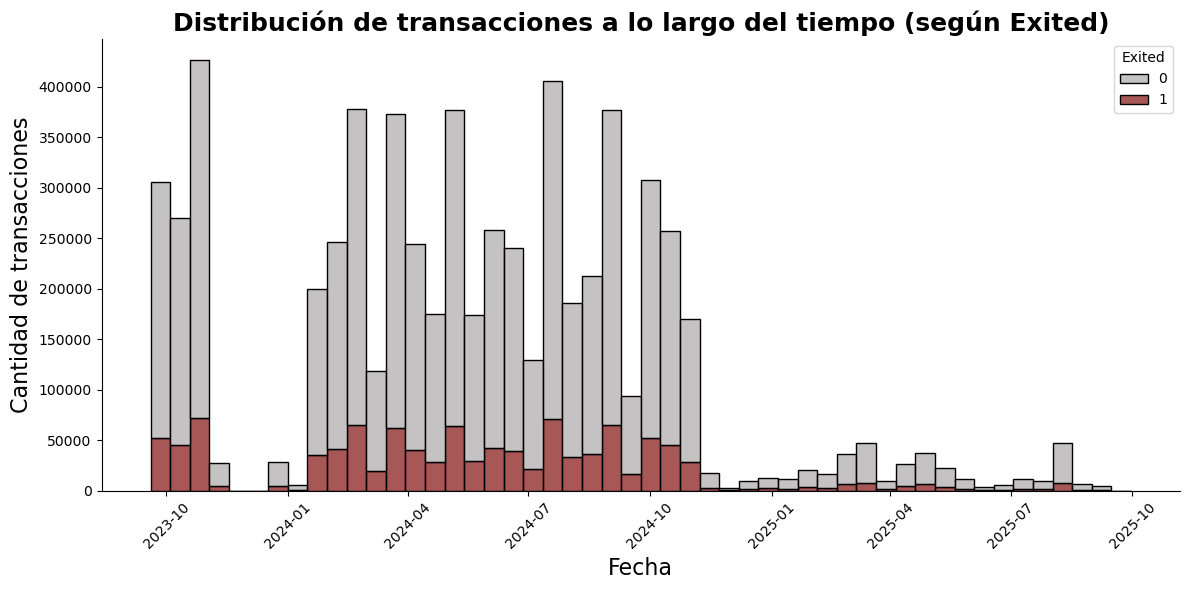

In [118]:
exited_colors = [GRIS_3, BORDO_2]

plt.figure(figsize=(12,6))
sns.histplot(
    data=df_prueba,  # o df_tx si ahí tenés todas las transacciones
    x="fecha",
    hue="Exited",
    bins=50,          # podés ajustar el número de bins
    multiple="stack", # apila los histogramas
    palette=exited_colors
)
plt.title("Distribución de transacciones a lo largo del tiempo (según Exited)", fontsize=18, fontweight='bold')
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Cantidad de transacciones", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(IMG_PATH/'dist_trans_exited.png', dpi=300)
sns.despine()
plt.show()

#### **Observaciones Asignación Transacciones**

Dado que el dataset original de **PaySim**, los steps estaban pensados en horas, es normal que a medida que se acerca fin de mes (ultimos steps 240 aproximadamente), la cantidad de transacciones baje, esto se refleja en la caida abrupta en los últimos 10 meses asignados con el rango.

A su vez, será necesario "dibujar" cierto patrón en los datos, como tendencia a menor transacciones en los Churners a medida que se acerca la fecha de abandono, así como también abandonos repentinos.

A su vez, para que este patrón no sea determinante, deberán existir clientes **No Churners** que presenten comportamientos similares para que el modelo no "haga trampa".

### <font color='#FCB53B'>**Transacciones: Asignacion de fechas**</font>

In [119]:
# Reproducibilidad


np.random.seed(RANDOM_SEED)

# --- DEFINICIONES GLOBALES ---
all_dates = pd.date_range(start_date, end_date, freq='D')
client_abandon = df_clients.set_index('CustomerId')['ExitDate'].to_dict()
client_exited  = df_clients.set_index('CustomerId')['Exited'].to_dict()

# --- HIPERPARÁMETROS DE REALISMO (AJUSTABLES) ---
# Probabilidad de que un churner se vaya "de golpe" sin mostrar decadencia.
PROB_CHURN_REPENTINO = 0.20

# Probabilidad de que un cliente FIEL tenga un período de inactividad.
PROB_PAUSA_NO_CHURNER = 0.15
PROB_NO_CHURNER_ALZA = 0.4
PROB_CLIENTE_IRREGULAR = 0.05

# Rango de duración de la pausa para clientes fieles (en días).
PAUSA_DURACION_MIN_DIAS = 60
PAUSA_DURACION_MAX_DIAS = 120


def sample_dates_for_client(n, cid):
    """
    Asigna fechas a 'n' transacciones para un cliente 'cid' con una lógica realista y con ruido.
    """
    # Generar pesos con ruido dependiendo dirección
    def create_noisy_weights(dates_array, direction='increasing', noise_scale=0.3):
        if len(dates_array) == 0:
            return None, None # Devuelve None si no hay fechas
            
        if direction == 'increasing':
            trend = np.linspace(start=0.5, stop=1.5, num=len(dates_array))
        else: # decreasing
            trend = np.linspace(start=1.5, stop=0.5, num=len(dates_array))
        
        noise = np.random.normal(loc=0, scale=noise_scale, size=len(dates_array))
        weights = trend + noise
        weights[weights < 0] = 0
        
        # Evitar error si todos los pesos son 0
        if np.sum(weights) == 0:
            weights = np.ones(len(dates_array))
            
        weights /= np.sum(weights)
        return dates_array, weights

    # --- CASO 1: CLIENTE NO-CHURNER ---
    if client_exited.get(cid, 0) == 0:
        
        # Sub-caso 1.1: Cliente Leal CON PAUSA
        if np.random.rand() < PROB_PAUSA_NO_CHURNER:
            
            duracion_pausa = np.random.randint(PAUSA_DURACION_MIN_DIAS, PAUSA_DURACION_MAX_DIAS)
            
            if len(all_dates) > duracion_pausa:
                start_offset = np.random.randint(0, len(all_dates) - duracion_pausa)
                pausa_inicio = all_dates[start_offset]
                pausa_fin = pausa_inicio + pd.Timedelta(days=duracion_pausa)
                fechas_disponibles = all_dates[(all_dates < pausa_inicio) | (all_dates > pausa_fin)]
            else:
                fechas_disponibles = all_dates

            noise_param = 0.7 if np.random.rand() < PROB_CLIENTE_IRREGULAR else 0.3
            direction_param = 'increasing' if np.random.rand() < PROB_NO_CHURNER_ALZA else 'decreasing'
         
            dates, p = create_noisy_weights(fechas_disponibles, direction=direction_param, noise_scale=noise_param)
            
            if dates is not None:
                return np.random.choice(dates, size=n, replace=True, p=p)
                
        # Sub-caso 1.2: Cliente Leal SIN PAUSA        
        else:
            # Comportamiento para cliente sin pausa
            noise_param = 0.7 if np.random.rand() < PROB_CLIENTE_IRREGULAR else 0.3
            direction_param = 'increasing' if np.random.rand() < PROB_NO_CHURNER_ALZA else 'decreasing'
            
            # Dado que no tiene pausa se utiliza all_dates
            dates, p = create_noisy_weights(all_dates, direction=direction_param, noise_scale=noise_param)
            return np.random.choice(dates, size=n, replace=True, p=p)

    # --- CASO 2: CLIENTE CHURNER ---
    else:
        exit_date = client_abandon.get(cid)
        if pd.isna(exit_date):
            return np.random.choice(all_dates, size=n, replace=True)

        active_dates = all_dates[all_dates <= exit_date]
        if len(active_dates) == 0:
            return np.random.choice(all_dates, size=n, replace=True)

        # Sub-caso 2.1: Churner REPENTINO
        if np.random.rand() < PROB_CHURN_REPENTINO:
            # Actividad creciente HASTA la fecha de salida
            if np.random.rand() < PROB_CLIENTE_IRREGULAR:
                dates, p = create_noisy_weights(active_dates, direction='increasing', noise_scale=0.7)
            else:
                dates, p = create_noisy_weights(active_dates, direction='increasing')
            return np.random.choice(dates, size=n, replace=True, p=p)
            
        # Sub-caso 2.2: Churner CON DECADENCIA
        else:
            # Actividad decreciente ANTES de la fecha de salida
            if np.random.rand() < PROB_CLIENTE_IRREGULAR:
                dates, p = create_noisy_weights(active_dates, direction='decreasing', noise_scale=0.7)
            else:
                dates, p = create_noisy_weights(active_dates, direction='decreasing')
            return np.random.choice(dates, size=n, replace=True, p=p)

# --- BUCLE DE APLICACIÓN (SIN CAMBIOS) ---
# Este código se mantiene igual, ya que solo llama a la función que hemos mejorado.
df_assigned['date'] = None
grouped = df_assigned.groupby('CustomerId').size().reset_index(name='n_tx')

# (Opcional: para ver el progreso si tarda mucho) from tqdm import tqdm
for cid, n in tqdm(grouped.values, desc="Asignando fechas"):
#for cid, n in grouped.values:
    dates = sample_dates_for_client(n, cid)
    df_assigned.loc[df_assigned['CustomerId'] == cid, 'date'] = dates

Asignando fechas:  17%|██████████▎                                                 | 1658/9640 [00:39<03:12, 41.54it/s]

KeyboardInterrupt



In [ ]:
df_assigned.head()

In [ ]:
df_assigned['date'] = pd.to_datetime(df_assigned['date'])

In [ ]:
df_tx_clean = df_assigned.copy()

In [ ]:
df_tx_clean.drop(['step', 'fecha', 'amount_q1', 'amount_q3'], axis=1, inplace=True)

In [ ]:
df_prueba = df_tx_clean.merge(df_clients[['CustomerId', 'Exited']], on='CustomerId', how='left')

In [ ]:
exited_colors = [GRIS_3, BORDO_2]

plt.figure(figsize=(12,6))

sns.histplot(
    data=df_prueba,  # o df_tx si ahí tenés todas las transacciones
    x="date",
    hue="Exited",
    bins=50,          # podés ajustar el número de bins
    multiple="stack", # apila los histogramas
    palette=exited_colors
)
plt.title("Distribución de transacciones a lo largo del tiempo (según Exited)", fontsize=18, fontweight='bold')
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Cantidad de transacciones", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(IMG_PATH/'dist_trans_exited.png', dpi=300)
sns.despine()
plt.show()

### <font color='#FCB53B'>**Limpieza Datasets**</font>

***Se descartarán algunas de las columnas utilizadas para clusterización y asignación de transacciones para conservar datasets más livianos***

In [ ]:
df_tx_col_order = ['date', 'CustomerId', 'type', 'amount', 'amount_label', 'type_freq', 'frequency_label',
                   'amount_score', 'freq_score', 'tran_score', 'tran_score_cont',
                   'tran_label']

In [ ]:
df_tx_clean = df_tx_clean[df_tx_col_order].sort_values(by='date')

In [ ]:
df_clients.columns

In [ ]:
df_clients_clean = df_clients.copy()

In [ ]:
df_clients_clean = df_clients_clean.drop(['cluster_time', 'wealth_score', 'cluster_wealth', 'engagement_score',
                                           'cluster_engagement', 'wealth_score_norm', 'engagement_score_norm',
                                           'cluster_time_num', 'final_score', 'cluster_final'], 
                                         axis=1)

In [ ]:
df_tx_clean['CustomerId'].nunique()

### <font color='#FCB53B'>**Escalado del monto de las transacciones**</font>

***Debido a que los datasets provienen de fuentes diferentes, para simular un escenario real de transacciones correspondientes a los clientes del banco (Dataset Churn), se escalarán los montos de las transacciones de acuerdo a las variables `Balance` y `EstimatedSalary` de dicho dataset***

In [ ]:

# --------------------------
# Parámetros ajustables
# --------------------------
monetary_min = 1.0        # monto mínimo posible
monetary_max = df_clients_clean['EstimatedSalary'].max() * 0.7 # monto máximo posible
clip_low_pct = 0.01       # recortar bottom 1% de amounts
clip_high_pct = 0.99      # recortar top 1% de amounts
eps = 1e-6

# --------------------------
# 0) Preparar clients: obtener EstimatedSalary por CustomerId
#    (si ya tienes max_tx_cap, lo recalculamos de forma robusta)
# --------------------------
clients = df_clients_clean[['CustomerId','EstimatedSalary','Balance']].drop_duplicates().set_index('CustomerId')

# 1) compresión de salario: log1p + min-max
clients['salary_log'] = np.log1p(clients['EstimatedSalary'].fillna(0.0))
scaler = MinMaxScaler()
clients['salary_norm'] = scaler.fit_transform(clients[['salary_log']])

# 2) mapear a rango monetario (cap por cliente)
clients['max_tx_cap'] = clients['salary_norm'] * (monetary_max - monetary_min) + monetary_min

# si querés dar algo de peso al balance, podrías usar:
# clients['max_tx_cap'] = 0.85*clients['max_tx_cap'] + 0.15*(clients['Balance'].clip(upper=monetary_max))

# 3) merge con df (si df ya contiene CustomerId)
df = df_tx_clean.merge(clients[['max_tx_cap']], left_on='CustomerId', right_index=True, how='left')

# 4) recortar amounts por percentiles para evitar outliers extremos
q_low, q_high = df['amount'].quantile([clip_low_pct, clip_high_pct])
df['amount_clipped'] = df['amount'].clip(lower=q_low, upper=q_high)

# 5) normalizar clipped amount a rango 0..1 (si q_high==q_low proteger)
den = (q_high - q_low) if (q_high - q_low) > 0 else eps
df['amount_ratio'] = (df['amount_clipped'] - q_low) / den
df['amount_ratio'] = df['amount_ratio'].clip(0,1)

# 6) calcular amount_scaled
df['amount_scaled'] = (df['amount_ratio'] * df['max_tx_cap']).clip(lower=monetary_min).round(2)

In [ ]:
df['CustomerId'].nunique()

In [ ]:
df.head()

In [ ]:
uniques = df['CustomerId'].unique()

In [ ]:
df_clients_filtered = df_clients_clean[df_clients_clean['CustomerId'].isin(uniques)].copy()

In [ ]:
df_clients_filtered['Exited'].value_counts()

In [ ]:
# Histograma simple de amount_scaled
plt.figure(figsize=(10,6))
plt.hist(df['amount_scaled'], bins=100, color=BORDO_1, edgecolor='black', alpha=0.7)
plt.title("Distribución de Transacciones (amount_scaled)", fontsize=14)
plt.xlabel("Monto escalado")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.4)
plt.show()

In [ ]:
df_tx_scaled = df.copy()

# <font color='#315aa0'>**Salud del Dataset - Exploración**</font>

## <font color='#c37171'>**Chequeos Generales**</font>

In [ ]:
# Clientes
print("Clientes - info general:")
print(df_clients_filtered.info())
print(df_clients_filtered.describe())

# Transacciones
print("\nTransacciones - info general:")
print(df_tx_scaled.info())
print(df_tx_scaled.describe())

# Chequear duplicados
print("\nDuplicados clientes:", df_clients_filtered.duplicated(subset=['CustomerId']).sum())
print("Duplicados transacciones:", df_tx_scaled.duplicated(subset=['CustomerId','date','amount']).sum())

# Chequear missing values
print("\nMissing en clientes:\n", df_clients_filtered.isna().sum())
print("\nMissing en transacciones:\n", df_tx_scaled.isna().sum())

## <font color='#c37171'>**Distribuciones Numéricas**</font>

In [ ]:
# Definir colores
main_color = BORDO_1
secondary = BORDO_2
kde_color = CREMA_1

In [ ]:
numeric_cols_clients = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
numeric_cols_tx = ['amount','amount_clipped','amount_ratio','amount_scaled']

# Histogramas clientes
plt.figure(figsize=(14,10))
for i,col in enumerate(numeric_cols_clients):
    plt.subplot(3,3,i+1)
    sns.histplot(df_clients_clean[col], bins=30, kde=True,
                 color=main_color,
                 line_kws={'color': kde_color, 'linewidth': 2})
    plt.title(col)
plt.tight_layout()
plt.savefig(os.path.join(IMG_PATH, "df_clients_numerical_dist.png"), dpi=300)
plt.show()

## <font color='#c37171'>**Churn**</font>

In [ ]:
# Pie chart distribución churn
churn_counts = df_clients_clean['Exited'].value_counts(normalize=True)

plt.figure(figsize=(6,6))
colors = [main_color, kde_color]  # Exited=0 → kde_color, Exited=1 → main_color
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=exited_colors,
                  labels=['No Churn (0)', 'Churn (1)'])
plt.ylabel("")  # quitar etiqueta del eje
plt.title("Distribución de Churn")
plt.savefig(os.path.join(IMG_PATH, "churn_distribution_pie.png"), dpi=300)
plt.show()

## <font color='#c37171'>**Correlación**</font>

In [ ]:
corr_columns = numeric_cols_clients
corr_columns.append('Exited')
plt.figure(figsize=(10,8))
sns.heatmap(df_clients_clean[corr_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación variables clientes")
plt.savefig(os.path.join(IMG_PATH, "corr_matrix.png"), dpi=300)
plt.show()

# <font color='#315aa0'>**App Interaction Dataset Generation**</font>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import uuid

# --- REPRODUCIBILIDAD ---
# Es fundamental para que los resultados sean consistentes en cada ejecución.
RANDOM_SEED = 42
RNG = np.random.default_rng(RANDOM_SEED)

# --- CONFIGURACIÓN GLOBAL DE RUIDO ---
# Estos parámetros añaden variabilidad y realismo al comportamiento de los usuarios.
LAMBDA_NOISE_SIGMA = 0.20 # Variabilidad en la actividad mensual de cada cliente.
DECAY_NOISE_SIGMA = 0.25   # Variabilidad en el decaimiento de actividad de los churners.
PROB_NOISE_SIGMA = 0.15    # Variabilidad en las acciones que realiza un usuario en cada sesión.

# --- DEFINICIONES DE TIEMPO Y CLUSTERS ---
# (Asegúrate de que 'start_date' y 'end_date' estén definidas previamente)
freq = "M"  # Agruparemos la actividad por Meses.
months = pd.period_range(start=start_date, end=end_date, freq=freq).to_timestamp('M')

# nombres de clusters según tu df_clients
clusters = [
    "Nuevos - Poco Valor",
    "Clientes potenciales",
    "Standard",
    "Valioso - Bajo compromiso",
    "VIP"
]

# parámetros base por cluster (ejemplo; ajustalos)
cluster_params = {
    "Nuevos - Poco Valor": {
        "base_sessions_per_month": 1.5,
        "duration_mu": 2.0,  # log-normal mu
        "duration_sigma": 0.6,
        "p_transfer": 0.02,
        "p_payment": 0.05,
        "p_invest": 0.01,
        "p_push_open": 0.10,
        "p_failed_login": 0.01,
    },
    "Clientes potenciales": {
        "base_sessions_per_month": 3.0,
        "duration_mu": 2.3,
        "duration_sigma": 0.7,
        "p_transfer": 0.06,
        "p_payment": 0.08,
        "p_invest": 0.02,
        "p_push_open": 0.15,
        "p_failed_login": 0.02,
    },
    "Standard": {
        "base_sessions_per_month": 4.0,
        "duration_mu": 2.7,
        "duration_sigma": 0.8,
        "p_transfer": 0.10,
        "p_payment": 0.12,
        "p_invest": 0.03,
        "p_push_open": 0.18,
        "p_failed_login": 0.03,
    },
    "Valioso - Bajo compromiso": {
        "base_sessions_per_month": 3.5,
        "duration_mu": 2.6,
        "duration_sigma": 0.8,
        "p_transfer": 0.12,
        "p_payment": 0.10,
        "p_invest": 0.05,
        "p_push_open": 0.12,
        "p_failed_login": 0.02,
    },
    "VIP": {
        "base_sessions_per_month": 8.0,
        "duration_mu": 3.0,
        "duration_sigma": 0.9,
        "p_transfer": 0.25,
        "p_payment": 0.20,
        "p_invest": 0.15,
        "p_push_open": 0.35,
        "p_failed_login": 0.01,
    }
}


# --- PARÁMETROS DE COMPORTAMIENTO DE CHURN Y TENURE ---
prob_churn_repentino_app = 0.20 # 20% de los churners se irán "de golpe".
last_n_months_decay = 6       # Ventana de 6 meses donde la actividad de un churner decae.
decay_final_frac = 0.05       # La actividad cae hasta un 5% de lo normal justo antes de irse.
tenure_max = df_clients['Tenure'].max()
tenure_weight = 0.5           # Influencia de la antigüedad del cliente en su actividad.

# ==============================================================================
# === (NUEVO) HIPERPARÁMETROS DE PAUSA PARA NO CHURNERS ===
# ==============================================================================
PROB_PAUSA_NO_CHURNER_APP = 0.15  # 15% de los clientes fieles tendrán una pausa.
PAUSA_DURACION_MIN_MESES = 2       # Duración mínima de la pausa en meses.
PAUSA_DURACION_MAX_MESES = 4       # Duración máxima de la pausa en meses.
# ==============================================================================

# --- 1) PREPARAR BASE CLIENTE x MES ---
clients = df_clients[['CustomerId','cluster_label','Exited','ExitDate','Tenure']].copy()
clients['Tenure'] = clients['Tenure'].astype(float)

# Crear tabla con una fila por cada cliente y cada mes de la simulación.
cust_ids = clients['CustomerId'].values
n_cust = len(cust_ids)
n_months = len(months)
grid = pd.DataFrame({
    'CustomerId': np.repeat(cust_ids, n_months),
    'month': np.tile(months.to_numpy(), n_cust)
})
grid = grid.merge(clients, on='CustomerId', how='left')

# Mapa de churners repentinos (sin cambios).
churners_repentinos = (RNG.random(len(clients[clients['Exited'] == 1])) < prob_churn_repentino_app)
client_repentino_map = clients[clients['Exited'] == 1].set_index('CustomerId').assign(is_repentino=churners_repentinos)['is_repentino'].to_dict()


# ==============================================================================
# === (NUEVO) PRE-CÁLCULO DE LAS PAUSAS DE ACTIVIDAD PARA CLIENTES FIELES ===
# ==============================================================================
# 1. Seleccionar qué clientes no-churners tendrán una pausa.
no_churners = clients[clients['Exited'] == 0].copy()
clientes_con_pausa_ids = no_churners.sample(frac=PROB_PAUSA_NO_CHURNER_APP, random_state=RANDOM_SEED)['CustomerId']

# 2. Para cada cliente seleccionado, definir el inicio y fin de su pausa.
pause_info = []
total_meses = len(months)
for cid in clientes_con_pausa_ids:
    duracion_pausa = np.random.randint(PAUSA_DURACION_MIN_MESES, PAUSA_DURACION_MAX_MESES + 1)
    if total_meses > duracion_pausa:
        start_offset = np.random.randint(0, total_meses - duracion_pausa)
        pausa_inicio = months[start_offset]
        pausa_fin = months[start_offset + duracion_pausa - 1]
        pause_info.append({'CustomerId': cid, 'pause_start': pausa_inicio, 'pause_end': pausa_fin})

# 3. Unir la información de las pausas a la tabla principal `grid`.
if pause_info:
    df_pausas = pd.DataFrame(pause_info)
    grid = grid.merge(df_pausas, on='CustomerId', how='left')
else:
    grid['pause_start'] = pd.NaT
    grid['pause_end'] = pd.NaT

grid['pause_start'] = grid['pause_start'].fillna(pd.NaT)
grid['pause_end'] = grid['pause_end'].fillna(pd.NaT)
# ==============================================================================


# --- FUNCIÓN DE CÁLCULO DE ACTIVIDAD MENSUAL (MODIFICADA) ---
def compute_lambda_row(row):
    params = cluster_params.get(row['cluster_label'], cluster_params['Standard'])
    
    # Cálculo de Lambda Base con ruido (sin cambios).
    base_lam = params['base_sessions_per_month']
    tenure_factor = (row['Tenure'] / tenure_max) * tenure_weight
    mean_lam = base_lam * (1 + tenure_factor)
    noise_factor_base = np.clip(RNG.normal(loc=1.0, scale=LAMBDA_NOISE_SIGMA), 0.5, 2.0)
    lam = max(0.01, mean_lam * noise_factor_base)

    # ==========================================================================
    # === (MODIFICADO) LÓGICA PARA NO-CHURNERS CON PAUSAS ===
    # ==========================================================================
    if row['Exited'] == 0:
        is_in_pause = pd.notna(row['pause_start']) and (row['month'] >= row['pause_start']) and (row['month'] <= row['pause_end'])
        
        if is_in_pause:
            return 0.0  # Si está en pausa, la actividad de este mes es CERO.
        else:
            return lam  # Si no, tiene su actividad normal.
    # ==========================================================================
            
    # --- LÓGICA PARA CHURNERS (Sin cambios) ---
    else: # (row['Exited'] == 1)
        exit_date = pd.to_datetime(row['ExitDate'])
        month_end = row['month'] + pd.offsets.MonthEnd(0)
        
        if month_end >= exit_date:
            return 0.0
        
        is_repentino = client_repentino_map.get(row['CustomerId'], False)
        if is_repentino:
            return lam
        else:
            months_before = int(((exit_date.to_period('M') - row['month'].to_period('M')).n))
            if months_before <= last_n_months_decay and months_before > 0:
                frac = months_before / float(last_n_months_decay)
                base_decay_factor = (decay_final_frac + (1 - decay_final_frac) * frac)
                noise_decay_factor = np.clip(RNG.normal(loc=1.0, scale=DECAY_NOISE_SIGMA), 0.5, 1.5)
                lam = lam * base_decay_factor * noise_decay_factor
                return max(0.01, lam)
    
    return lam # Devuelve el lambda para los meses de churners fuera de la ventana de decaimiento


# --- APLICACIÓN DE LA FUNCIÓN Y GENERACIÓN DE DATOS (SIN CAMBIOS) ---

# Aplicar la función mejorada para calcular la actividad mensual de cada cliente.
grid['lambda'] = grid.apply(compute_lambda_row, axis=1)

# 3) Samplear el número de sesiones por cliente-mes usando una distribución de Poisson.
grid['n_sessions'] = RNG.poisson(grid['lambda'].values)

# Eliminar meses sin actividad para optimizar memoria.
grid = grid[grid['n_sessions'] > 0].reset_index(drop=True)

# 4) Expandir a nivel de sesión.
rep_counts = grid['n_sessions'].values
total_sessions = rep_counts.sum()
print(f"Total sesiones generadas: {total_sessions:,}")

session_customer = np.repeat(grid['CustomerId'].values, rep_counts)
session_month = np.repeat(grid['month'].values.astype('datetime64[ns]'), rep_counts)

# 5) Generar propiedades para cada sesión.
cust_to_cluster = clients.set_index('CustomerId')['cluster_label'].to_dict()
session_cluster = np.vectorize(cust_to_cluster.get)(session_customer)

# Duración de la sesión.
mu_map = {k: v['duration_mu'] for k, v in cluster_params.items()}
sigma_map = {k: v['duration_sigma'] for k, v in cluster_params.items()}
mu_arr = np.vectorize(mu_map.get)(session_cluster)
sigma_arr = np.vectorize(sigma_map.get)(session_cluster)
durations = np.clip(RNG.lognormal(mean=mu_arr, sigma=sigma_arr), 0.5, 180.0)

# Probabilidades base de cada evento.
p_transfer_base = np.vectorize(lambda cl: cluster_params[cl]['p_transfer'])(session_cluster)
p_payment_base  = np.vectorize(lambda cl: cluster_params[cl]['p_payment'])(session_cluster)
p_invest_base   = np.vectorize(lambda cl: cluster_params[cl]['p_invest'])(session_cluster)
p_push_base     = np.vectorize(lambda cl: cluster_params[cl]['p_push_open'])(session_cluster)
p_fail_base     = np.vectorize(lambda cl: cluster_params[cl]['p_failed_login'])(session_cluster)

# Inyectar ruido a las probabilidades.
noise_factors = np.clip(RNG.normal(loc=1.0, scale=PROB_NOISE_SIGMA, size=total_sessions), 0.5, 1.5)
p_transfer = np.clip(p_transfer_base * noise_factors, 0.001, 0.999)
p_payment  = np.clip(p_payment_base * noise_factors, 0.001, 0.999)
p_invest   = np.clip(p_invest_base * noise_factors, 0.001, 0.999)
p_push     = np.clip(p_push_base * noise_factors, 0.001, 0.999)
p_fail     = np.clip(p_fail_base * noise_factors, 0.001, 0.999)

# Muestreo de eventos para cada sesión.
used_transfer = RNG.random(total_sessions) < p_transfer
used_payment  = RNG.random(total_sessions) < p_payment
used_invest   = RNG.random(total_sessions) < p_invest
opened_push   = RNG.random(total_sessions) < p_push
failed_login  = RNG.random(total_sessions) < p_fail

# Asignar fechas aleatorias dentro de cada mes.
month_starts = pd.to_datetime(session_month).to_period('M').to_timestamp()
month_ends = (pd.to_datetime(session_month).to_period('M') + 1).to_timestamp() - pd.Timedelta(days=1)
days_in_month = (month_ends - month_starts).days + 1
rand_days = RNG.integers(0, days_in_month, size=total_sessions)
session_dates = month_starts + pd.to_timedelta(rand_days, unit='D')

# Crear IDs de sesión.
session_ids = np.arange(total_sessions).astype(str)

# Ensamblar el DataFrame final a nivel de sesión.
df_sessions = pd.DataFrame({
    'session_id': session_ids,
    'CustomerId': session_customer,
    'cluster_label': session_cluster,
    'date': session_dates,
    'duration_min': durations,
    'used_transfer': used_transfer.astype(int),
    'used_payment': used_payment.astype(int),
    'used_invest': used_invest.astype(int),
    'opened_push': opened_push.astype(int),
    'failed_login': failed_login.astype(int)
})

# 6) Agregados por cliente a nivel mensual.
df_sessions['month'] = df_sessions['date'].dt.to_period('M').dt.to_timestamp()
agg = df_sessions.groupby(['CustomerId','month']).agg(
    num_sessions = ('session_id','count'),
    total_duration = ('duration_min','sum'),
    avg_session_duration = ('duration_min','mean'),
    pct_transfer = ('used_transfer','mean'),
    pct_payment  = ('used_payment','mean'),
    pct_invest   = ('used_invest','mean'),
    pct_push_open = ('opened_push','mean'),
    n_failed_logins = ('failed_login','sum'),
    last_session = ('date','max')
).reset_index()

agg['days_since_last_login'] = (pd.to_datetime(end_date) - agg['last_session']).dt.days

# 7) Agregados por cliente a nivel global (features para el modelo).
customer_features = agg.groupby('CustomerId').agg(
    total_sessions = ('num_sessions','sum'),
    mean_sessions_per_month = ('num_sessions','mean'),
    median_session_duration = ('avg_session_duration','median'),
    pct_sessions_with_transfer = ('pct_transfer','mean'),
    total_failed_logins = ('n_failed_logins','sum'),
    months_active = ('month','nunique'),
    last_session_date = ('last_session','max')
).reset_index()

customer_features = customer_features.merge(df_clients[['CustomerId','cluster_label','Exited','Tenure']], on='CustomerId', how='left')

# 8) Validaciones y resumen final.
print("\n--- Resumen de Datos Generados ---")
print(f"Sesiones totales: {len(df_sessions):,}")
print(f"Clientes con >=1 session: {customer_features.shape[0]:,}")
print("\nEstadísticas de 'total_sessions' por cluster:")
print(customer_features.groupby('cluster_label')['total_sessions'].describe(percentiles=[0.25,0.5,0.75]))

In [ ]:
# NOTA: Asegúrate de que df_sessions y df_clients estén disponibles en este punto.

# 1. Calcular la fecha de la última sesión por cliente en df_sessions
# La columna de fecha en df_sessions es 'date'.
last_session_date = df_sessions.groupby('CustomerId')['date'].max().reset_index(name='LastSessionDate')

# 2. Filtrar clientes que abandonaron y unirlos con su última sesión
df_churned = df_clients[df_clients['Exited'] == 1].copy()
# Seleccionamos las columnas relevantes y realizamos el merge
df_churned_check = df_churned[['CustomerId', 'ExitDate', 'Exited']].merge(
    last_session_date, on='CustomerId', how='left'
)

# 3. Realizar la comprobación de integridad
# El error ocurre si la ExitDate es ANTES de la LastSessionDate.
df_churned_check['TemporalIntegrityError'] = df_churned_check['ExitDate'] < df_churned_check['LastSessionDate']

# 4. Reportar los casos problemáticos (donde el error es True)
integrity_violations = df_churned_check[df_churned_check['TemporalIntegrityError'] == True]

print(f"Clientes que abandonaron ('Exited'=1): {df_churned.shape[0]}")
print(f"Clientes con violación de integridad temporal: {integrity_violations.shape[0]}")

if integrity_violations.empty:
    print("\n✅ ¡Validación completada! No se encontraron sesiones después de las fechas de salida registradas.")
else:
    print("\n🚨 ¡ATENCIÓN! Se encontraron violaciones de integridad. Primeros 5 casos:")
    # Usamos .dt.date para imprimir las fechas de forma limpia
    violations_clean = integrity_violations[['CustomerId', 'ExitDate', 'LastSessionDate']].copy()
    violations_clean['ExitDate'] = violations_clean['ExitDate'].dt.date
    violations_clean['LastSessionDate'] = violations_clean['LastSessionDate'].dt.date
    
    print(violations_clean.head())
    print("\nEstas filas indican que el cliente tuvo actividad de sesión posterior a su fecha de salida ('ExitDate').")

In [ ]:
df_sessions

In [ ]:
customer_features

# <font color='#315aa0'>**Filtrado**</font>

In [ ]:
df_clients_filtered = df_clients_filtered[df_clients_filtered['CustomerId'].isin(uniques)].copy()
df_tx_filtered = df_tx_scaled[df_tx_scaled['CustomerId'].isin(uniques)].copy()
df_sessions_filtered = df_sessions[df_sessions['CustomerId'].isin(uniques)].copy()
customer_features_filtered = customer_features[customer_features['CustomerId'].isin(uniques)].copy()

# <font color='#315aa0'>**Factor externo**</font>

In [ ]:
# Datos de Inflación Mensual (IAPC % interanual)
# Fuente Histórica: Eurostat
# Fuente Proyecciones: FMI / Comisión Europea (tendencia mensual simulada para alinear)

# Las fechas corresponden al final de cada mes.
inflacion_francia = {
    '2023-01-31': 7.0, '2023-02-28': 7.3, '2023-03-31': 6.7, '2023-04-30': 6.9, 
    '2023-05-31': 6.0, '2023-06-30': 5.3, '2023-07-31': 5.1, '2023-08-31': 5.7, 
    '2023-09-30': 5.7, '2023-10-31': 4.5, '2023-11-30': 3.9, '2023-12-31': 4.1,
    '2024-01-31': 3.4, '2024-02-29': 3.2, '2024-03-31': 2.4, '2024-04-30': 2.4, 
    '2024-05-31': 2.7, '2024-06-30': 3.1, '2024-07-31': 2.9, '2024-08-31': 2.8, # Datos hasta Ago 2024
    # Proyecciones simuladas para alinearse con ~2.1% en 2025
    '2024-09-30': 2.7, '2024-10-31': 2.6, '2024-11-30': 2.5, '2024-12-31': 2.4,
    '2025-01-31': 2.3, '2025-02-28': 2.2, '2025-03-31': 2.1, '2025-04-30': 2.1,
    '2025-05-31': 2.0, '2025-06-30': 2.0, '2025-07-31': 1.9, '2025-08-31': 1.9,
    '2025-09-30': 1.8
}

inflacion_alemania = {
    '2023-01-31': 9.2, '2023-02-28': 9.3, '2023-03-31': 7.8, '2023-04-30': 7.6, 
    '2023-05-31': 6.3, '2023-06-30': 6.8, '2023-07-31': 6.5, '2023-08-31': 6.4, 
    '2023-09-30': 4.3, '2023-10-31': 3.0, '2023-11-30': 2.3, '2023-12-31': 3.8,
    '2024-01-31': 3.1, '2024-02-29': 2.7, '2024-03-31': 2.3, '2024-04-30': 2.4, 
    '2024-05-31': 2.8, '2024-06-30': 2.5, '2024-07-31': 2.3, '2024-08-31': 2.4, # Datos hasta Ago 2024
    # Proyecciones simuladas para alinearse con ~2.2% en 2025
    '2024-09-30': 2.4, '2024-10-31': 2.3, '2024-11-30': 2.3, '2024-12-31': 2.2,
    '2025-01-31': 2.2, '2025-02-28': 2.1, '2025-03-31': 2.1, '2025-04-30': 2.0,
    '2025-05-31': 2.0, '2025-06-30': 2.0, '2025-07-31': 1.9, '2025-08-31': 1.9,
    '2025-09-30': 1.9
}

inflacion_espania = {
    '2023-01-31': 5.9, '2023-02-28': 6.0, '2023-03-31': 3.1, '2023-04-30': 3.8, 
    '2023-05-31': 2.9, '2023-06-30': 1.6, '2023-07-31': 2.1, '2023-08-31': 2.4, 
    '2023-09-30': 3.3, '2023-10-31': 3.5, '2023-11-30': 3.3, '2023-12-31': 3.3,
    '2024-01-31': 3.5, '2024-02-29': 2.9, '2024-03-31': 3.3, '2024-04-30': 3.4, 
    '2024-05-31': 3.8, '2024-06-30': 3.6, '2024-07-31': 3.5, '2024-08-31': 3.1, # Datos hasta Ago 2024
    # Proyecciones simuladas para alinearse con ~2.0% en 2025
    '2024-09-30': 3.0, '2024-10-31': 2.8, '2024-11-30': 2.7, '2024-12-31': 2.6,
    '2025-01-31': 2.5, '2025-02-28': 2.4, '2025-03-31': 2.3, '2025-04-30': 2.2,
    '2025-05-31': 2.1, '2025-06-30': 2.0, '2025-07-31': 2.0, '2025-08-31': 1.9,
    '2025-09-30': 1.9
}

In [ ]:
# Convertir los diccionarios en un único DataFrames
df_fr = pd.DataFrame(list(inflacion_francia.items()), columns=['month_date', 'inflation_rate'])
df_fr['Geography'] = 'France'

df_de = pd.DataFrame(list(inflacion_alemania.items()), columns=['month_date', 'inflation_rate'])
df_de['Geography'] = 'Germany'

df_es = pd.DataFrame(list(inflacion_espania.items()), columns=['month_date', 'inflation_rate'])
df_es['Geography'] = 'Spain'


df_inflacion = pd.concat([df_fr, df_de, df_es], ignore_index=True)

# Convertir a datetime y normalizar la tasa de inflación (de % a decimal)
df_inflacion['month_date'] = pd.to_datetime(df_inflacion['month_date'])
df_inflacion['inflation_rate'] = df_inflacion['inflation_rate'] / 100.0

print("DataFrame de Inflación Real y Proyectada:")
print(df_inflacion.sample(5))

In [ ]:
# Definir los límites de los percentiles
bins = df_clients_filtered['EstimatedSalary'].quantile([0, .2, .8, 1.]).tolist()

# Definimos las etiquetas
labels = ['High', 'Medium', 'Low'] # 'High' vulnerabilidad para el 20% más bajo

# Asignar etiquetas
df_clients_filtered['vulnerability_tier'] = pd.cut(df_clients_filtered['EstimatedSalary'], 
                                          bins=bins, 
                                          labels=labels, 
                                          include_lowest=True,
                                          duplicates='drop')

# Asignamos un score numérico
vulnerability_map = {'High': 3, 'Medium': 2, 'Low': 1} 
df_clients_filtered['vulnerability_score'] = df_clients_filtered['vulnerability_tier'].map(vulnerability_map)

print("\nAsignación de Vulnerabilidad a Clientes:")
print(df_clients_filtered[['CustomerId', 'EstimatedSalary', 'vulnerability_tier', 'vulnerability_score']].head())

In [ ]:
df_clients_filtered.head()

# <font color='#315aa0'>**Guardado Datasets**</font>

In [ ]:
df_clients_filtered.to_parquet(DATA_PATH/'clients.parquet', index=False)
df_tx_filtered.to_parquet(DATA_PATH/'transactions.parquet', index=False)
df_sessions_filtered.to_parquet(DATA_PATH/'app_sessions.parquet', index=False)
df_inflacion.to_parquet(DATA_PATH/'IAPCs.parquet', index=False)

Ideas para distribuir mejor las transacciones, parones, churns repentinos, etc:


* Debe haber **churners** que dejen su actividad de un momento para otro y otros de manera progresiva.
* Debe haber **no churners** que también tengan parones de actividad repentinos:
  - Podría separar el rango de fechas en cuartos y utilizando probabilidades que no se asignen fechas en uno de esos cuartos.
  - Incluso dar un muy pequeño porcentaje para que no tenga en más de un cuarto.
  - No necesariamente tengo que dividir en cuartos, puedo probar distintas variaciones para esto.


El mayor error estaba en los no churners, acá es donde tengo que corregir principalmente.